In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

import sys
import os
sys.path.append('/'.join(os.getcwd().split('/')[:-2]))
#print(sys.path)
import util.items as items

In [2]:
import keras
from keras.layers import InputLayer
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

Using TensorFlow backend.


In [73]:
item = "Shark"

In [74]:
similar = items.getSimilarItems(item)
print(similar)
similar = [a[0] for a in similar]
similar = similar[:]
print(similar)

[('Monkfish', 6), ('Dark_crab', 6), ('Curry', 6), ('Anglerfish', 6), ("Greenman's_ale", 6)]
['Monkfish', 'Dark_crab', 'Curry', 'Anglerfish', "Greenman's_ale"]


In [75]:
items.getPrices(item)[-10:]

[828, 825, 831, 833, 848, 849, 848, 846, 839, 838]

In [76]:
items.getInfo(item)

{'alchable': 'True',
 'buyLimit': '10000',
 'destroy': 'Drop',
 'edible': 'True',
 'equipable': 'False',
 'examine': "I\\'d better be careful eating this",
 'exchangePrice': '856',
 'highAlch': '102',
 'image': '/w/File:Shark.png',
 'lowAlch': '68',
 'members': 'True',
 'name': 'Shark',
 'noteable': 'True',
 'quest': 'No',
 'released': '27 February 2002',
 'seller': 'N/A',
 'stackable': 'False',
 'storeCurrency': 'N/A',
 'storeprice': 'N/A',
 'tradeable': 'True',
 'update': '/w/Update:Latest_RuneScape_News_(27_February_2002)',
 'weight': '0.65'}

1295 1301 1295 1288 349


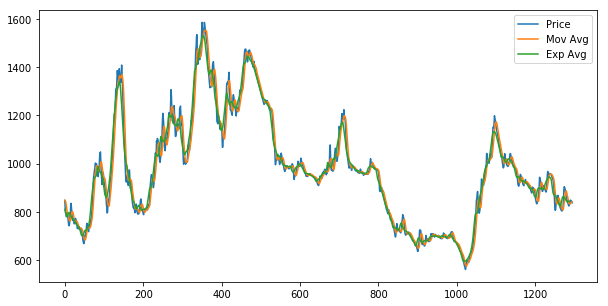

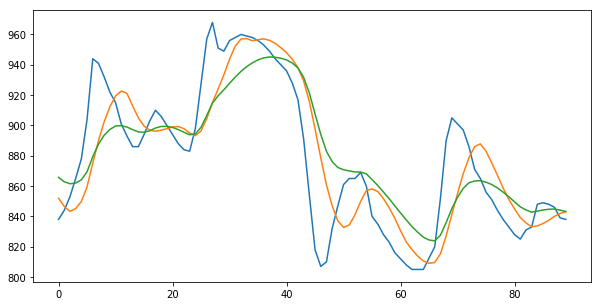

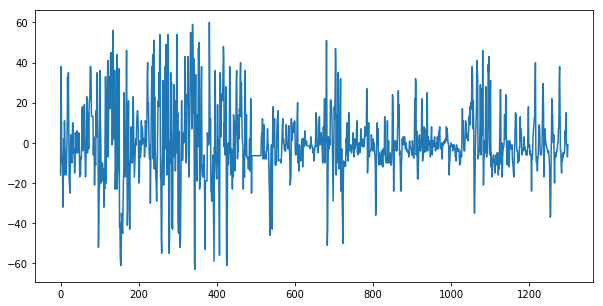

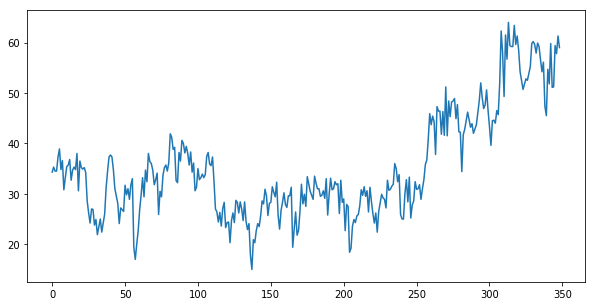

In [77]:
ma = 21
prices = items.getPrices(item)
changes = items.getPriceChanges(item)
movAvg = items.sma(prices)
expAvg = items.ema(prices)
quant = items.getQuants(item)
print(len(movAvg),len(prices),len(movAvg),len(expAvg),len(quant))
plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(prices[-1*len(movAvg):],label='Price')
plt.plot(movAvg,label='Mov Avg')
plt.plot(expAvg,label='Exp Avg')
plt.legend()
plt.show()
plt.plot(prices[-90:])
plt.plot(movAvg[-90:])
plt.plot(expAvg[-90:])
plt.show()
plt.plot(changes)
plt.show()
plt.plot(quant)
plt.show()

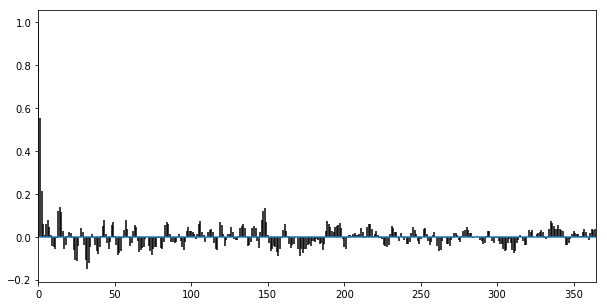

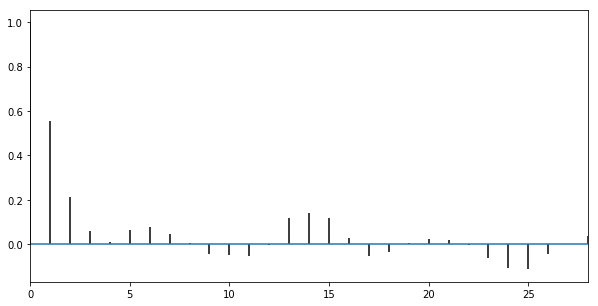

In [78]:
plt.acorr(changes,maxlags=365)
plt.xlim(0,365)
plt.show()
plt.acorr(changes,maxlags=28)
plt.xlim(0,28)
plt.show()

In [79]:
def classify(d):
    if d>=0:
        return 1
    if d<0:
        return 0
       

In [80]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))

features = [changes,expAvg]
for i in range(len(features)):
    features[i] = list(scaler.fit_transform(np.array(features[i]).reshape(-1, 1)).reshape(len(features[i]),))

fsizes = [5,5]
x = []
y = []
p = []
size = sum(fsizes)

fsMax = max(fsizes)

fMin = len(features[0])
for f in features:
    if len(f)<fMin:
        fMin=len(f)
        
for i in range(-1*fMin+fsMax,0,1):
    xelem = []
    for j in range(len(features)):
        xelem = xelem + features[j][i-fsizes[j]:i]
    x.append(xelem)
    y.append(classify(changes[i]))
    p.append(prices[i])
print(x[0],x[-1])
print(len(x[0]),len(x[-1]))
print(y[0],y[-1])
#y = keras.utils.to_categorical(y, num_classes=2)

[-0.08943089430894308, -0.15447154471544716, -0.23577235772357724, -0.17073170731707316, -0.00813008130081299, -0.5388543619099202, -0.5496009080752293, -0.5634758786282823, -0.578921826014934, -0.5928784759012551] [0.2682926829268293, 0.04065040650406507, 0.008130081300813028, -0.00813008130081299, -0.08943089430894308, -0.468785220858676, -0.4672081574176703, -0.46612645017774357, -0.4657591327210302, -0.46743635845449316]
10 10
1 0


1026 1026 128 128 129 129 129
10 [-0.08943089 -0.15447154 -0.23577236 -0.17073171 -0.00813008 -0.53885436
 -0.54960091 -0.56347588 -0.57892183 -0.59287848]
1
10 [ 0.23577236  0.25203252 -0.02439024 -0.04065041 -0.04065041 -0.25433426
 -0.25084698 -0.24867992 -0.24794212 -0.24844302]
0


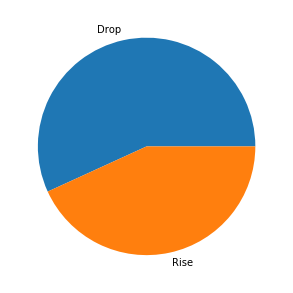

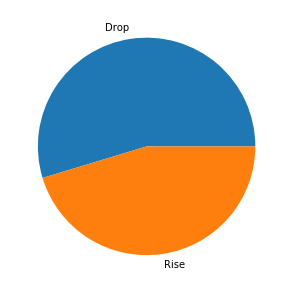

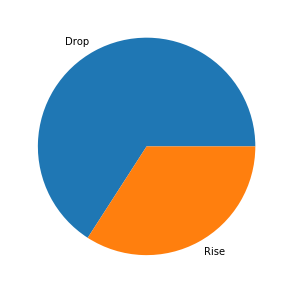

In [81]:
#scaler.fit_transform(np.array(changes).reshape(-1, 1)).reshape(len(changes),)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

s1 = int(len(y)*.8)
s2  =int(len(y)*.9)

x_train = np.array(x[:s1])
y_train = np.array(y[:s1])

x_val = np.array(x[s1:s2])
y_val = np.array(y[s1:s2])
p_val = np.array(p[s1:s2])

x_test = np.array(x[s2:])
y_test = np.array(y[s2:])
p_test = np.array(p[s2:])

print(len(x_train),len(y_train),len(x_val),len(y_val),len(x_test),len(y_test),len(p_test))
print(len(x_train[0]),x_train[0])
print(y_train[0])
print(len(x_test[0]),x_test[0])
print(y_test[0])
plt.pie([list(y_train).count(0)/len(y_train),list(y_train).count(1)/len(y_train)],labels=['Drop','Rise'])
plt.show()
plt.pie([list(y_val).count(0)/len(y_val),list(y_val).count(1)/len(y_val)],labels=['Drop','Rise'])
plt.show()
plt.pie([list(y_test).count(0)/len(y_test),list(y_test).count(1)/len(y_test)],labels=['Drop','Rise'])
plt.show()

In [84]:
model = Sequential()
model.add(Dense(int(size*2), input_dim=size, activation='sigmoid'))
model.add(Dense(int(size*2), activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_19 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 21        
Total params: 661
Trainable params: 661
Non-trainable params: 0
_________________________________________________________________
None


In [85]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
            validation_data=(x_val,y_val),
            epochs=50,
            batch_size=16)

Train on 1026 samples, validate on 128 samples
Epoch 1/50
1026/1026 [==============================] - 1s 721us/step - loss: 0.7896 - acc: 0.4288 - val_loss: 0.6934 - val_acc: 0.5000
Epoch 2/50
1026/1026 [==============================] - 0s 209us/step - loss: 0.6860 - acc: 0.5585 - val_loss: 0.6845 - val_acc: 0.5469
Epoch 3/50
1026/1026 [==============================] - 0s 200us/step - loss: 0.6810 - acc: 0.5682 - val_loss: 0.6807 - val_acc: 0.5469
Epoch 4/50
1026/1026 [==============================] - 0s 210us/step - loss: 0.6792 - acc: 0.5682 - val_loss: 0.6761 - val_acc: 0.5469
Epoch 5/50
1026/1026 [==============================] - 0s 207us/step - loss: 0.6779 - acc: 0.5682 - val_loss: 0.6702 - val_acc: 0.5469
Epoch 6/50
1026/1026 [==============================] - 0s 208us/step - loss: 0.6748 - acc: 0.5682 - val_loss: 0.6657 - val_acc: 0.5469
Epoch 7/50
1026/1026 [==============================] - 0s 209us/step - loss: 0.6727 - acc: 0.5721 - val_loss: 0.6638 - val_acc: 0.5469
E

In [86]:
score = model.evaluate(x_test, y_test, batch_size=1)
print(model.metrics_names)
print(score)

y_pred = model.predict(x_test)
true_pos = len([y_pred[i] for i in range(len(y_pred)) if y_pred[i]>.5 and y_test[i]>.5])
false_pos = len([y_pred[i] for i in range(len(y_pred)) if y_pred[i]>.5 and y_test[i]<.5])
true_neg = len([y_pred[i] for i in range(len(y_pred)) if y_pred[i]<.5 and y_test[i]<.5])
false_neg = len([y_pred[i] for i in range(len(y_pred)) if y_pred[i]<.5 and y_test[i]>.5])
print(true_pos,false_pos,true_neg,false_neg,true_pos+true_neg+false_pos+false_neg)
print('Accuracy: ', (true_pos+true_neg)/(true_pos+true_neg+false_pos+false_neg))
prec = (true_pos)/(true_pos+false_pos)
print('Precision: ', prec)
recall = (true_pos)/(true_pos+false_neg)
print('Recall: ', recall)
print('F1: ', (2*recall*prec)/(recall+prec))

129/129 [==============================] - 0s 1ms/step
['loss', 'acc']
[0.5343798535854317, 0.813953488372093]
25 5 80 19 129
Accuracy:  0.813953488372093
Precision:  0.8333333333333334
Recall:  0.5681818181818182
F1:  0.6756756756756758


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


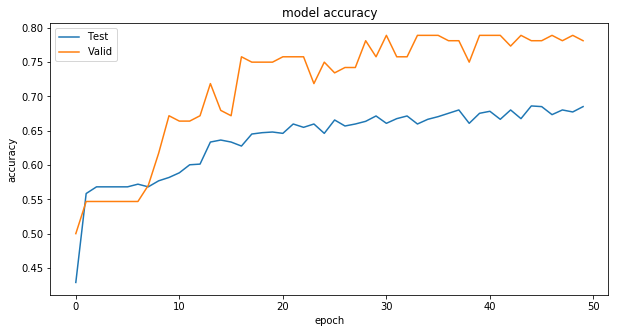

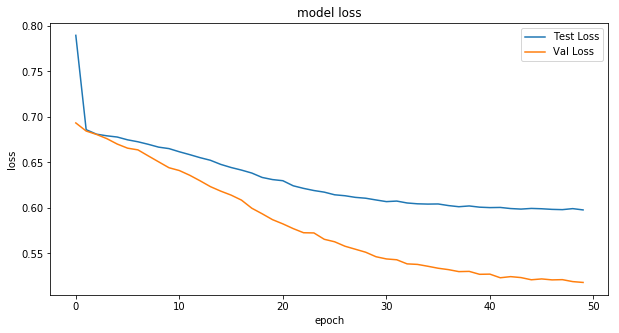

In [87]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'],label='Test')
plt.plot(history.history['val_acc'],label='Valid')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()
# summarize history for loss
plt.plot(history.history['loss'],label='Test Loss')
plt.plot(history.history['val_loss'],label='Val Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [88]:
print(y_test[:20])
print(p_test[:20])

[0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0]
[935. 928. 922. 913. 911. 909. 922. 923. 930. 935. 929. 924. 921. 918.
 914. 914. 917. 914. 912. 908.]


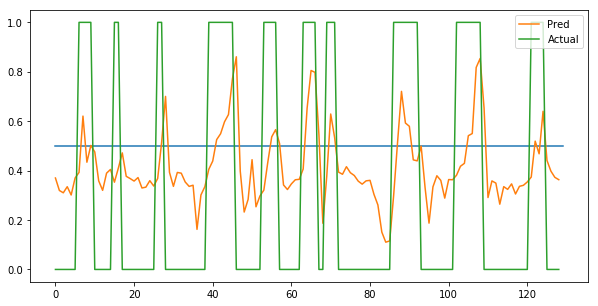

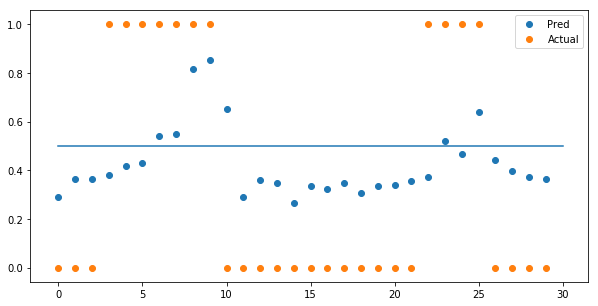

In [89]:
y_pred = model.predict(x_test)
plt.plot([0, len(y_pred)], [.5, .5])
plt.plot(y_pred,label='Pred')
plt.plot(y_test,label='Actual')
plt.legend()
plt.show()
plt.plot([0, len(y_test[-30:])], [.5, .5])
plt.scatter(range(len(y_test[-30:])),y_pred[-30:],label='Pred')
plt.scatter(range(len(y_test[-30:])),y_test[-30:],label='Actual')
#plt.plot(y_test[-31:],label='Actual-1')
plt.legend()
plt.show()

In [90]:
import util.trading_systems as ts

bl = int(items.getInfo(item)['buyLimit'])
print(len(x_test),len(y_test),len(p_test))
budgets = [10**5,10**6,10**7,10**8,10**9]
mpBest = [([-100],-1)] * len(budgets)
mpBestNoT = [[-100]] * len(budgets)
ppBest = [[-100]] * len(budgets)
bhBest = [[-100]] * len(budgets)
perBest = [[-100]] * len(budgets)

yp = model.predict(x_val)
for b in range(len(budgets)):
    t = 0
    for i in range(10):
        mp = ts.modelProfit(t,yp,p_val,bl,budgets[b])
        if mp[-1]>mpBest[b][0][-1] and mp[-1]!=0.0:
            mpBest[b] = (mp,t)
        t += .02

yp = model.predict(x_test)
for b in range(len(budgets)):
    print(budgets[b])
    t = 0
    bhBest[b] = ts.buyAndHold(p_test,bl,budgets[b])
    ppBest[b] = ts.perfectProfit(p_test,bl,budgets[b])
    perBest[b] = ts.persistanceProfit(p_test,bl,budgets[b])
    mpBest[b] = (ts.modelProfit(mpBest[b][1],yp,p_test,bl,budgets[b]),mpBest[b][1])
    mpBestNoT[b] = ts.modelProfit(0,yp,p_test,bl,budgets[b])

129 129 129
100000
1000000
10000000
100000000
1000000000


In [91]:
for b in range(len(budgets)):
    print(budgets[b])
    print('\tModel\n\t',mpBest[b][0][-1],mpBest[b][1])
    print('\tModel No T\n\t',mpBestNoT[b][-1],0)
    print('\tPersistance\n\t',perBest[b][-1])
    print('\tPerfect\n\t',ppBest[b][-1])
    print('\tBuy and Hold\n\t',bhBest[b][-1])

100000
	Model
	 0.2837 0
	Model No T
	 0.2837 0
	Persistance
	 0.47679
	Perfect
	 0.70069
	Buy and Hold
	 -0.10282
1000000
	Model
	 0.285479 0
	Model No T
	 0.285479 0
	Persistance
	 0.4780685
	Perfect
	 0.702571
	Buy and Hold
	 -0.103693
10000000
	Model
	 0.2497022 0
	Model No T
	 0.2497022 0
	Persistance
	 0.4445363
	Perfect
	 0.66275165
	Buy and Hold
	 -0.097
100000000
	Model
	 0.03615 0
	Model No T
	 0.03615 0
	Persistance
	 0.0903
	Perfect
	 0.154
	Buy and Hold
	 -0.0097
1000000000
	Model
	 0.003615 0
	Model No T
	 0.003615 0
	Persistance
	 0.00903
	Perfect
	 0.0154
	Buy and Hold
	 -0.00097


129 128 128 129


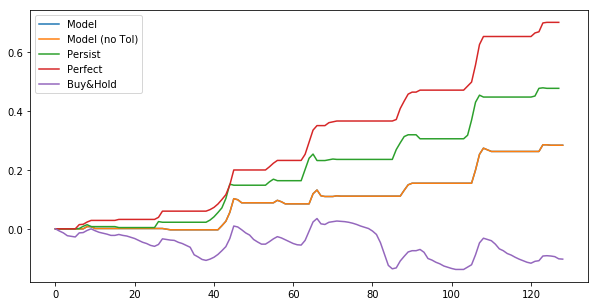

129 128 128 129


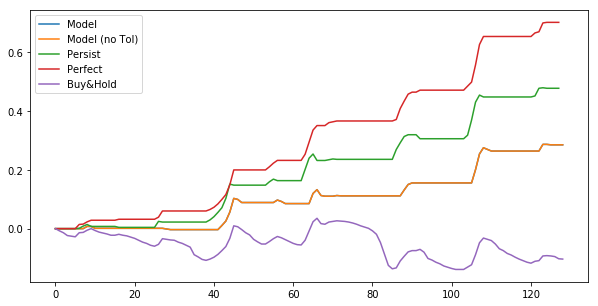

129 128 128 129


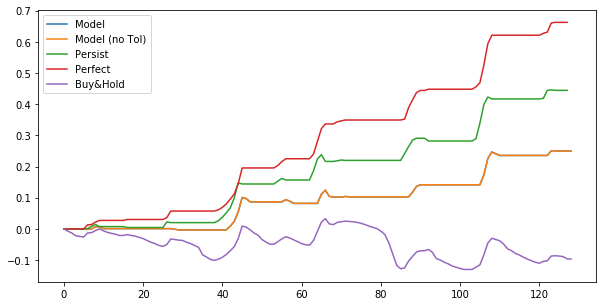

129 128 128 129


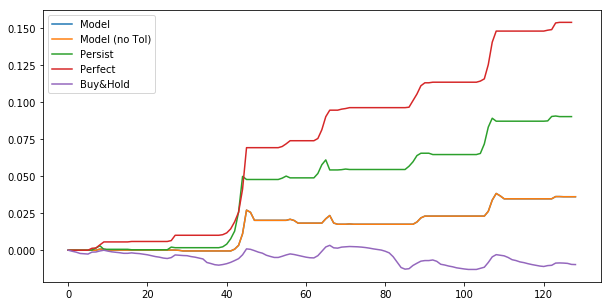

129 128 128 129


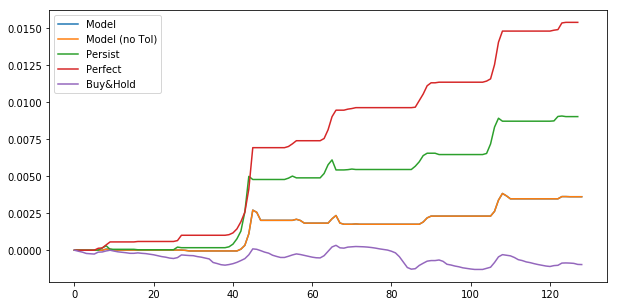

In [92]:
for b in range(len(budgets)):
    print(len(mpBest[b][0]),len(perBest[b]),len(ppBest[b]),len(bhBest[b]))
    plt.plot(mpBest[b][0],label='Model')
    plt.plot(mpBestNoT[b],label='Model (no Tol)')
    plt.plot(perBest[b],label='Persist')
    plt.plot(ppBest[b],label='Perfect')
    plt.plot(bhBest[b],label='Buy&Hold')
    plt.legend()
    plt.show()